# 2.3 Data Analysis: Centrality Metrics

In this notebook we  explore the characteristics of web trackers by analyzing the centrality metrics of the web crawled data. We will be looking at:

- In-, Out-, Degree
- Eccentricity
- (Harmonic) Closeness
- Betweeness
- Clustering

### Dataset Configuration

In [43]:
data_name = 'chrome-run-01'

### Set Up

In [44]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [46]:
import sys
visualization_path = os.path.join('..', 'src', 'visualization')
sys.path.append(visualization_path)
import visualize

For this analysis, we import the labeled ```interim``` data from the csv file:

In [47]:
formatted_data_name = formatted_string = f"{data_name.split('-')[0].capitalize()} (Run {data_name.split('-')[2].zfill(2)})"

# Import and label the csv data
csv_file_path = os.path.join('..', 'data', 'interim', f"labeled-{data_name}.csv")
df = pd.read_csv(csv_file_path, index_col=False)

print(df.shape)
# print(df.columns)

# Set color palette for labels
palette={0: 'tab:blue', 1: 'tab:red'}

(25338, 64)


### In-Degree Distribution

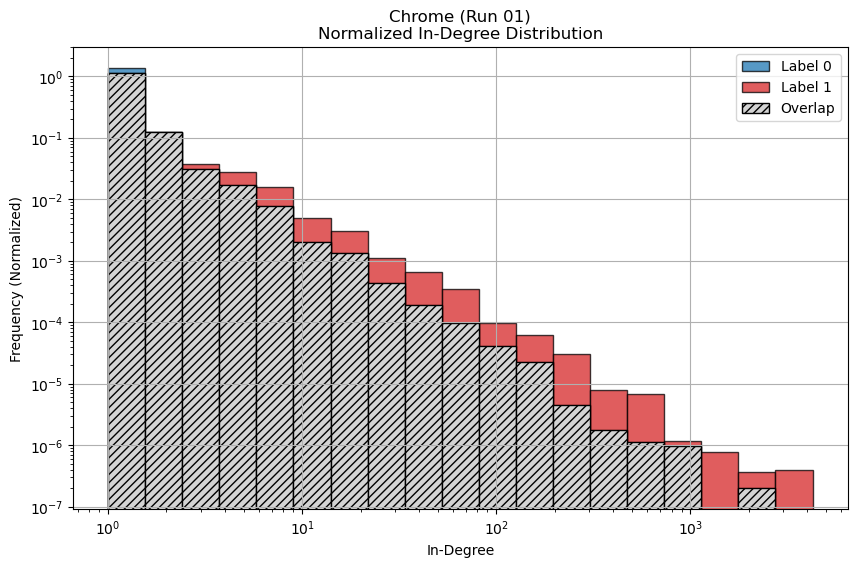

In [48]:
# Ensure all 'indegree' values are positive and split data by label
data_0 = df[(df['Label'] == 0) & (df['indegree'] > 0)]['indegree']
data_1 = df[(df['Label'] == 1) & (df['indegree'] > 0)]['indegree']

# Define log-scaled bins based on the combined range of data_0 and data_1
log_bins = np.logspace(np.log10(min(data_0.min(), data_1.min())), np.log10(max(data_0.max(), data_1.max())), num=20)

# Get normalized histogram data for both labels
hist0, _ = np.histogram(data_0, bins=log_bins, density=True)
hist1, _ = np.histogram(data_1, bins=log_bins, density=True)

# Set up the figure
fig = plt.figure(figsize=(10, 6))

# Plot histogram for Label 0
plt.bar(log_bins[:-1], hist0, width=np.diff(log_bins), align='edge', color='tab:blue', edgecolor='black', label='Label 0', alpha=0.75)

# Plot histogram for Label 1
plt.bar(log_bins[:-1], hist1, width=np.diff(log_bins), align='edge', color='tab:red', edgecolor='black', label='Label 1', alpha=0.75)

# Calculate the overlap
overlap = np.minimum(hist0, hist1)

# Plot the overlap in grey
plt.bar(log_bins[:-1], overlap, width=np.diff(log_bins), align='edge', color='lightgrey', edgecolor='black', label='Overlap', hatch='////')

# Setting log scale for the x-axis
plt.xscale('log')
plt.xlabel('In-Degree')
plt.yscale('log')
plt.ylabel('Frequency (Normalized)')
plt.title(f'{formatted_data_name}\nNormalized In-Degree Distribution')
plt.legend()
plt.grid(True)
plt.show()

visualize.save_report_figure(fig, data_name, 'in_degree_distribution')

### Out-Degree Distribution

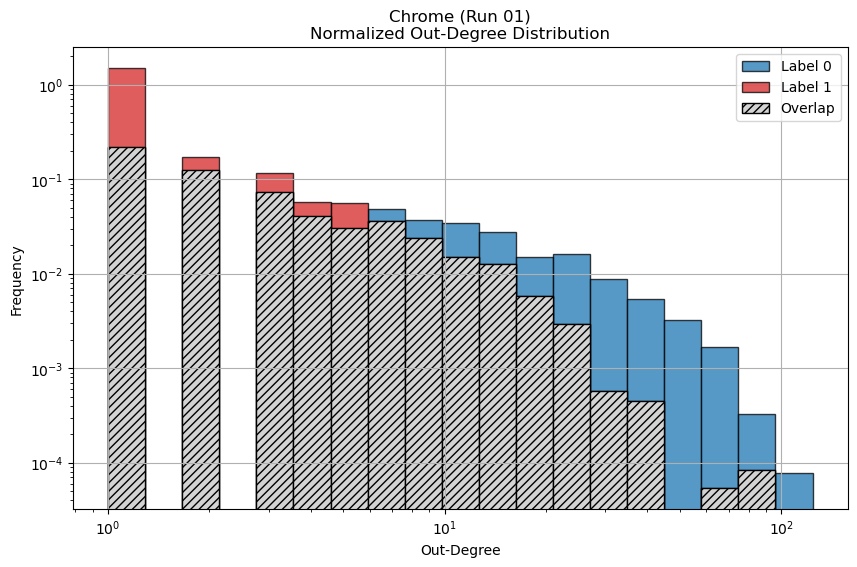

In [49]:
# Histogram with distribution of tracker's and non-tracker's out-degree value
data_0 = df[(df['Label'] == 0) & (df['outdegree'] > 0)]['outdegree']
data_1 = df[(df['Label'] == 1) & (df['outdegree'] > 0)]['outdegree']

log_bins = np.logspace(np.log10(min(data_0.min(), data_1.min())), np.log10(max(data_0.max(), data_1.max())), num=20)

hist0, _ = np.histogram(data_0, bins=log_bins, density=True)
hist1, _ = np.histogram(data_1, bins=log_bins, density=True)

fig = plt.figure(figsize=(10, 6))

plt.bar(log_bins[:-1], hist0, width=np.diff(log_bins), align='edge', color='tab:blue', edgecolor='black', label='Label 0', alpha=0.75)

plt.bar(log_bins[:-1], hist1, width=np.diff(log_bins), align='edge', color='tab:red', edgecolor='black', label='Label 1', alpha=0.75)

overlap = np.minimum(hist0, hist1)

plt.bar(log_bins[:-1], overlap, width=np.diff(log_bins), align='edge', color='lightgrey', edgecolor='black', label='Overlap', hatch='////')

plt.xscale('log')
plt.xlabel('Out-Degree')
plt.yscale('log')
plt.ylabel('Frequency')
plt.title(f'{formatted_data_name}\nNormalized Out-Degree Distribution')
plt.legend()
plt.grid(True)
plt.show()

visualize.save_report_figure(fig, data_name, 'out_degree_distribution')

### Degree Distribution

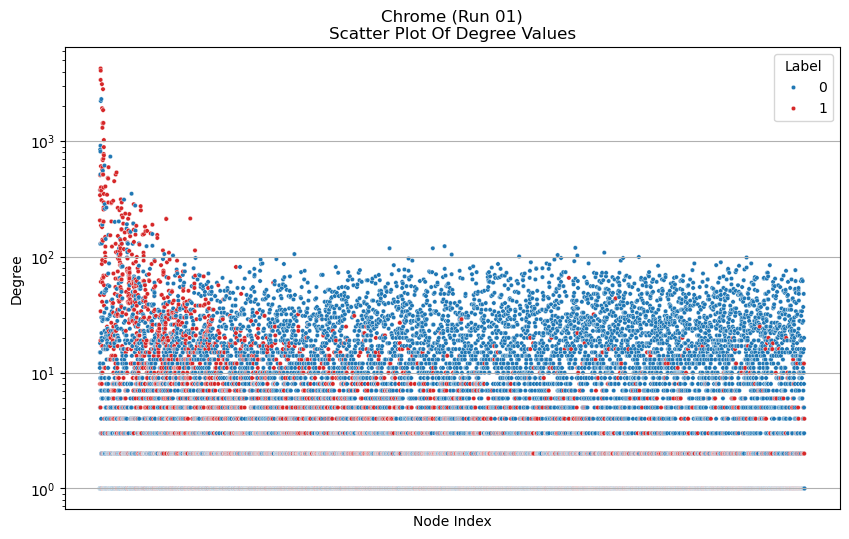

In [50]:
# Plot 1: Scatter plot of the degree values
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Id', y='degree', hue='Label', palette=palette, s=10)
plt.xlabel('Node Index')
plt.ylabel('Degree')
plt.yscale('log')
plt.title(f'{formatted_data_name}\nScatter Plot Of Degree Values')
plt.xticks([])
plt.grid(True)
plt.show()

visualize.save_report_figure(fig, data_name, 'degree_distribution_scatter')

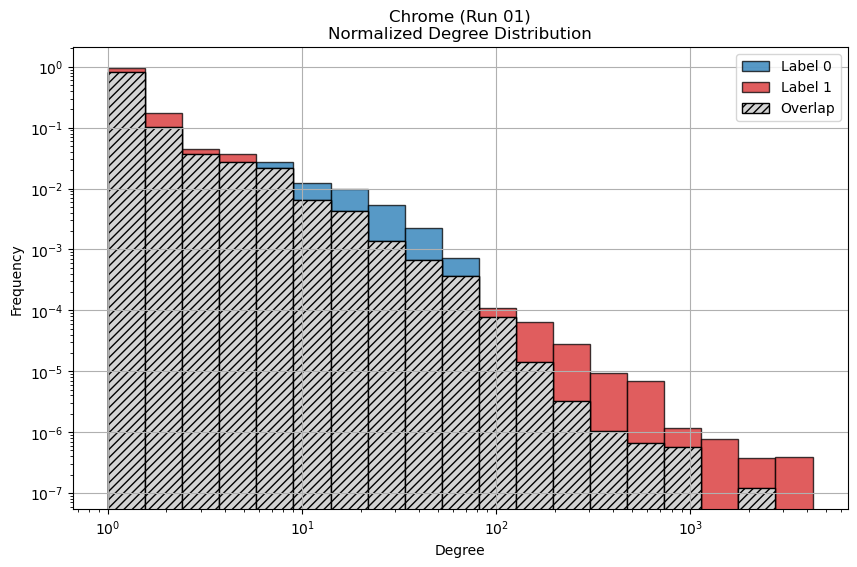

In [51]:
# Plot 2: Histogram with distribution of tracker's and non-tracker's degree value
data_0 = df[(df['Label'] == 0) & (df['degree'] > 0)]['degree']
data_1 = df[(df['Label'] == 1) & (df['degree'] > 0)]['degree']

log_bins = np.logspace(np.log10(min(data_0.min(), data_1.min())), np.log10(max(data_0.max(), data_1.max())), num=20)

hist0, _ = np.histogram(data_0, bins=log_bins, density=True)
hist1, _ = np.histogram(data_1, bins=log_bins, density=True)

fig = plt.figure(figsize=(10, 6))

plt.bar(log_bins[:-1], hist0, width=np.diff(log_bins), align='edge', color='tab:blue', edgecolor='black', label='Label 0', alpha=0.75)

plt.bar(log_bins[:-1], hist1, width=np.diff(log_bins), align='edge', color='tab:red', edgecolor='black', label='Label 1', alpha=0.75)

overlap = np.minimum(hist0, hist1)

plt.bar(log_bins[:-1], overlap, width=np.diff(log_bins), align='edge', color='lightgrey', edgecolor='black', label='Overlap', hatch='////')

plt.xscale('log')
plt.xlabel('Degree')
plt.yscale('log')
plt.ylabel('Frequency')
plt.title(f'{formatted_data_name}\nNormalized Degree Distribution')
plt.legend()
plt.grid(True)
plt.show()

visualize.save_report_figure(fig, data_name, 'degree_distribution_hist')

### Eccentricity

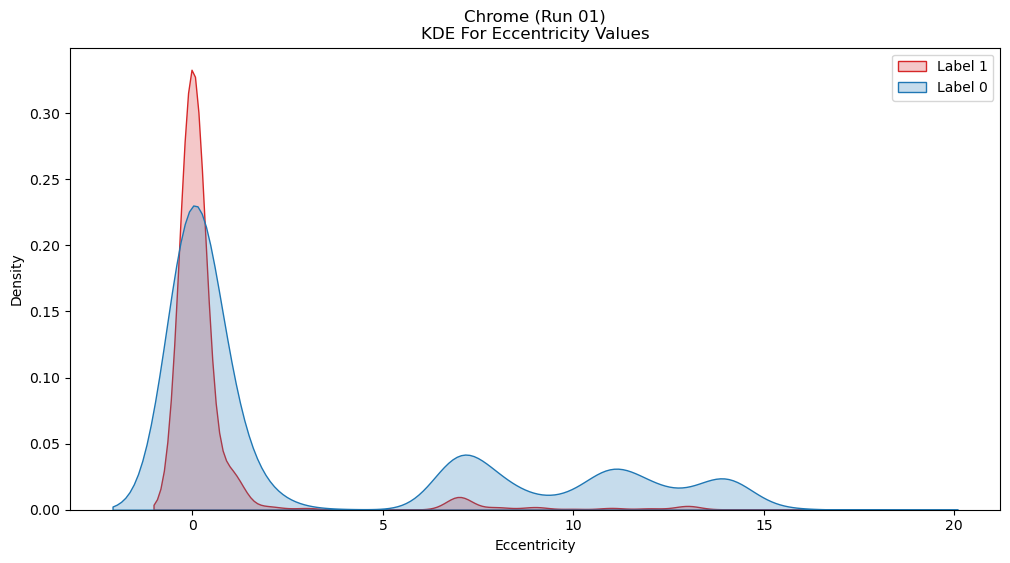

In [52]:
fig = plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Eccentricity', hue='Label', fill=True, palette=palette)
plt.title(f'{formatted_data_name}\nKDE For Eccentricity Values')
plt.xlabel('Eccentricity')
plt.ylabel('Density')

plt.legend(labels=['Label 1', 'Label 0'])
plt.show()

visualize.save_report_figure(fig, data_name, 'eccentricity')

### (Harmonic) Closeness

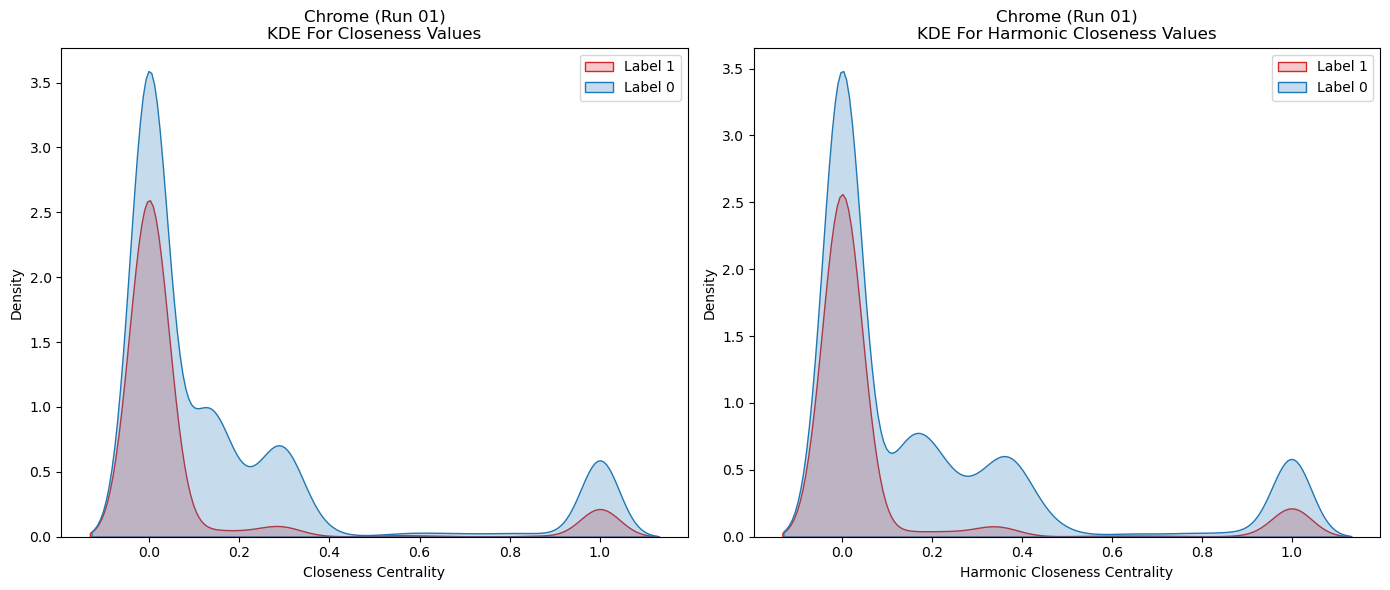

In [53]:
fig = plt.figure(figsize=(14, 6))

# Subplot 1: KDE of Closeness Centrality
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.kdeplot(data=df, x='closnesscentrality', hue='Label', fill=True, palette=palette)
plt.title(f'{formatted_data_name}\nKDE For Closeness Values')
plt.xlabel('Closeness Centrality')
plt.ylabel('Density')
plt.legend(labels=['Label 1', 'Label 0'])

# Subplot 2: 'KDE of Harmonic Closeness Centrality'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.kdeplot(data=df, x='harmonicclosnesscentrality', hue='Label', fill=True, palette=palette)
plt.title(f'{formatted_data_name}\nKDE For Harmonic Closeness Values')
plt.xlabel('Harmonic Closeness Centrality')
plt.ylabel('Density')
plt.legend(labels=['Label 1', 'Label 0'])

plt.tight_layout()

plt.show()

visualize.save_report_figure(fig, data_name, 'closeness')

### Betweeness

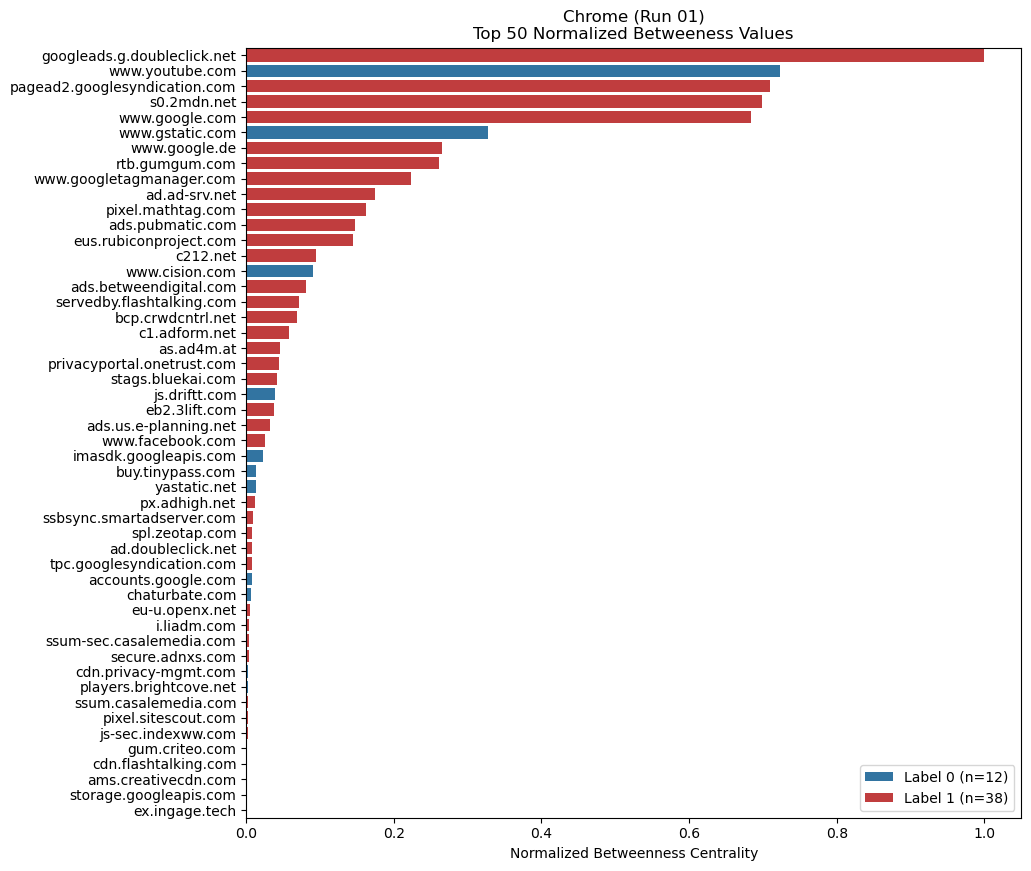

In [54]:
# Barchart for the top domains with the highest betweeness values
top_n = 50

# Sort the DataFrame by the betweeness centrality and take the top entries
top = df.sort_values('betweenesscentrality', ascending=False).head(top_n)

# Normalize 'betweenesscentrality'
top['normalized_betweeness'] = (top['betweenesscentrality'] - top['betweenesscentrality'].min()) / (top['betweenesscentrality'].max() - top['betweenesscentrality'].min())

# Calculate counts of trackers and non-trackers
trackers_count = top[top['Label'] == 1].shape[0]
non_trackers_count = top[top['Label'] == 0].shape[0]

fig, ax = plt.subplots(figsize=(10, 10))

# Create barplot with normalized values
sns.barplot(
    data=top, 
    y="Id", 
    x='normalized_betweeness',
    hue='Label',
    palette={0: 'tab:blue', 1: 'tab:red'},
    dodge=False,
    ax=ax  # Plot using the axis created above
)

# Update legend to include counts
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, 
          labels=[f'Label 0 (n={non_trackers_count})', f'Label 1 (n={trackers_count})'], loc='lower right')

ax.set_title(f'{formatted_data_name}\nTop {top_n} Normalized Betweeness Values')
ax.set_ylabel('')
ax.set_xlabel('Normalized Betweenness Centrality')

plt.show()

# Assuming visualize.save_report_figure is a function from another module
visualize.save_report_figure(fig, data_name, 'betweeness_normalized')


In [55]:
# Count values greater than threshold
threshold = 0.05
count_above = (top['normalized_betweeness'] > threshold).sum()

print(f"Number of values greater than {threshold} : {count_above}")

Number of values greater than 0.05 : 19


### Clustering

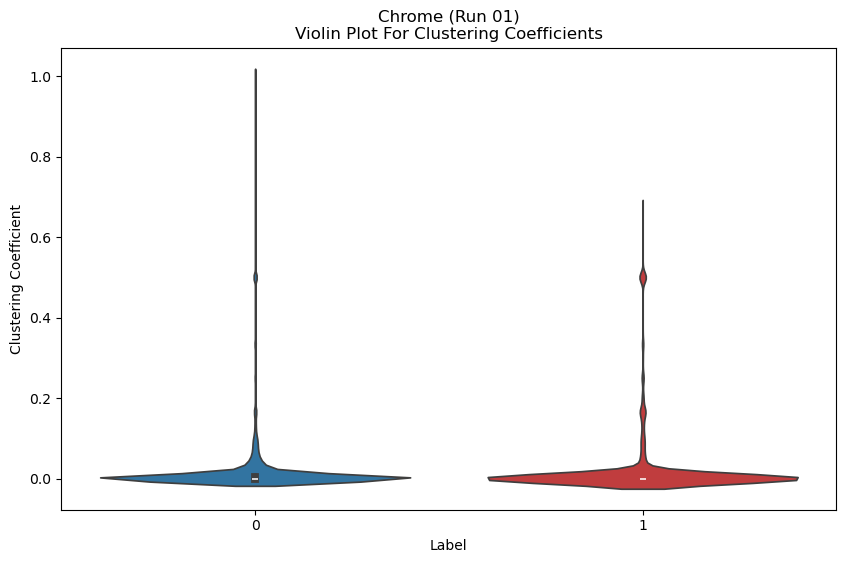

In [56]:
# Violin plot for each label and their clustering coefficients
palette={'0':'tab:blue', '1':'tab:red'}

fig = plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Label', y='clustering', palette=palette)
plt.title(f'{formatted_data_name}\nViolin Plot For Clustering Coefficients')
plt.xlabel('Label')
plt.ylabel('Clustering Coefficient')
plt.show()

visualize.save_report_figure(fig, data_name, 'clustering')